# Tujuan

- Membuat pertanyaan analisis atau bisnis yang ingin dicari jawabannya
- Melakukan eksplorasi terhadap setiap data untuk mencari insight menarik guna menjawab pertanyaan bisnis tersebut.

# Tahap Persiapan

In [1]:
# Menyiapkan environment
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customers_df = pd.read_csv("https://raw.githubusercontent.com/fauziyyahlaayla/Belajar-Analisis-Data-menggunakan-Python/main/Data-After-Preprocessing/customers_df.csv")
customers_df.head()


,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
0,1,fulan 1,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia
1,2,fulan 2,Prefer not to say,69,8327 Kirlin SummitApt. 461,8223,New Zacharyfort,South Australia,Australia
2,3,fulan 3,Prefer not to say,59,269 Gemma SummitSuite 109,5661,Aliburgh,Australian Capital Territory,Australia
3,4,fulan 4,Prefer not to say,67,743 Bailey GroveSuite 141,1729,South Justinhaven,Queensland,Australia
4,5,fulan 5,Prefer not to say,30,48 Hyatt ManorSuite 375,4032,Griffithsshire,Queensland,Australia


In [4]:
products_df = pd.read_csv("https://raw.githubusercontent.com/fauziyyahlaayla/Belajar-Analisis-Data-menggunakan-Python/main/Data-After-Preprocessing/products_df.csv")
products_df.head()


,product_id,product_type,product_name,size,colour,price,quantity,description
0,0,Shirt,Oxford Cloth,XS,red,114,66,"A red coloured, XS sized, Oxford Cloth Shirt"
1,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt"
2,2,Shirt,Oxford Cloth,M,red,114,54,"A red coloured, M sized, Oxford Cloth Shirt"
3,3,Shirt,Oxford Cloth,L,red,114,69,"A red coloured, L sized, Oxford Cloth Shirt"
4,4,Shirt,Oxford Cloth,XL,red,114,47,"A red coloured, XL sized, Oxford Cloth Shirt"


In [5]:
orders_df = pd.read_csv("https://raw.githubusercontent.com/fauziyyahlaayla/Belajar-Analisis-Data-menggunakan-Python/main/Data-After-Preprocessing/orders_df.csv")
orders_df.head()

,order_id,customer_id,payment,order_date,delivery_date
0,1,64,30811,2021-08-30,2021-09-24
1,2,473,50490,2021-02-03,2021-02-13
2,3,774,46763,2021-10-08,2021-11-03
3,4,433,39782,2021-05-06,2021-05-19
4,5,441,14719,2021-03-23,2021-03-24


In [6]:
sales_df = pd.read_csv("https://raw.githubusercontent.com/fauziyyahlaayla/Belajar-Analisis-Data-menggunakan-Python/main/Data-After-Preprocessing/sales_df.csv")
sales_df.head()

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
0,0,1,218,106,2,212
1,1,1,481,118,1,118
2,2,1,2,96,3,288
3,3,1,1002,106,2,212
4,4,1,691,113,3,339


# Menentukan Pertanyaan Bisnis

Sebagai perusahaan yang bergerak di bidang online fashion, DiCo perlu mengevaluasi performa penjualan (sales) dan memahami item fashion yang paling banyak dibeli. Selain itu, ia juga perlu lebih memahami pelanggannya (customer) sehingga dapat membuat sebuah strategi campaign yang lebih efisien.

Berdasarkan beberapa masalah tersebut, kita dapat mendefinisikan beberapa pertanyaan bisnis seperti berikut.

- Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?
- Produk apa yang paling banyak dan paling sedikit terjual?
- Bagaimana demografi pelanggan yang kita miliki?
Kapan terakhir pelanggan melakukan transaksi?
- Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir?
- Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir?

# Lakukan Eksplorasi Data

# Eksplorasi Data customers_df



In [7]:
# Melihat rangkuman Parameter Statistik
customers_df.describe(include='all')

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
count,1000.000000,1000,1000,1000.000000,1000,1000.000000,1000,1000,1000
unique,NaN,1000,3,NaN,1000,NaN,961,8,1
top,NaN,fulan 1000,Prefer not to say,NaN,1671 Lauren KnollSuite 945,NaN,East Sophia,South Australia,Australia
freq,NaN,1,742,NaN,1,NaN,3,139,1000
mean,499.440000,NaN,NaN,49.880000,NaN,5004.872000,NaN,NaN,NaN
std,289.390278,NaN,NaN,17.659316,NaN,2884.497332,NaN,NaN,NaN
min,1.000000,NaN,NaN,20.000000,NaN,2.000000,NaN,NaN,NaN
25%,248.750000,NaN,NaN,34.000000,NaN,2401.750000,NaN,NaN,NaN
50%,498.500000,NaN,NaN,50.000000,NaN,5083.000000,NaN,NaN,NaN
75%,750.250000,NaN,NaN,65.000000,NaN,7460.250000,NaN,NaN,NaN


In [9]:
# Demografi Pelanggan berdasarkan jenis kelamin (gender)
customers_df.groupby(by="gender").agg({
    "customer_id": "nunique",
    "age": ["max", "min", "mean", "std"]
})

customer_id age                          
                      nunique max min       mean        std
gender                                                     
Female                    115  79  20  49.147826  16.646607
Male                      143  80  20  51.230769  18.462635
Prefer not to say         741  80  20  49.733154  17.664101

In [16]:
# persebaran jumlah pelanggan berdasarkan kota (city) dan negara bagian (state)
city_counts = customers_df.groupby(by='city').customer_id.nunique().sort_values(ascending=False)
state_counts = customers_df.groupby(by='state').customer_id.nunique().sort_values(ascending=False)

print("Customer counts by City:")
display(city_counts)

print("\nCustomer counts by State:")
display(state_counts)

Customer counts by City:


,customer_id
city,
East Sophia,3
New Ava,3
East Aidan,3
Lake Sienna,2
Jademouth,2
...,...
Justinport,1
Kaiberg,1
Kaifort,1



Customer counts by State:


,customer_id
state,
South Australia,139
Queensland,134
New South Wales,132
Northern Territory,125
Western Australia,124
Australian Capital Territory,121
Victoria,121
Tasmania,104


# Eksplorasi Data orders_df

In [23]:
# mengubah tipe data ke datetime
orders_df["order_date"] = pd.to_datetime(orders_df["order_date"])
orders_df["delivery_date"] = pd.to_datetime(orders_df["delivery_date"])

# Menambahkan kolom delivery_time yang berasal dari selisih delivery_date dan order_date
delivery_time = orders_df["delivery_date"] - orders_df["order_date"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders_df["delivery_time"] = round(delivery_time/86400)

display(orders_df.tail())


,order_id,customer_id,payment,order_date,delivery_date,delivery_time
995,996,345,37843,2021-01-13,2021-02-02,20.0
996,997,346,53831,2021-01-18,2021-01-31,13.0
997,998,407,53308,2021-05-05,2021-05-21,16.0
998,999,428,31643,2021-06-15,2021-07-12,27.0
999,1000,896,27836,2021-04-07,2021-04-24,17.0


In [24]:
orders_df.describe(include='all')

,order_id,customer_id,payment,order_date,delivery_date,delivery_time
count,1000.000000,1000.000000,1000.000000,1000,1000,1000.000000
mean,500.500000,506.640000,33972.936000,2021-05-27 18:38:52.800000,2021-06-10 20:31:12,14.078000
min,1.000000,1.000000,10043.000000,2021-01-01 00:00:00,2021-01-03 00:00:00,1.000000
25%,250.750000,275.250000,21329.250000,2021-03-13 18:00:00,2021-03-28 00:00:00,8.000000
50%,500.500000,515.000000,33697.500000,2021-05-27 12:00:00,2021-06-11 12:00:00,14.000000
75%,750.250000,737.250000,46249.000000,2021-08-12 06:00:00,2021-08-24 06:00:00,21.000000
max,1000.000000,1000.000000,59910.000000,2021-10-24 00:00:00,2021-11-20 00:00:00,27.000000
std,288.819436,277.115502,14451.609047,NaN,NaN,7.707225


# Eksplorasi Data orders_df dan customers_df

In [27]:
# Menambahkan status di customers_df untuk melihat apakah pelanggan pernah melakukan order atau tidak berdasarkan order_df
customer_id_in_orders_df =  orders_df.customer_id.tolist()
customers_df["status"] = customers_df["customer_id"].apply(lambda x: "Active" if x in customer_id_in_orders_df else "Non Active")
customers_df.sample(5)

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country,status
741,742,fulan 742,Prefer not to say,44,275 Maddison Estate DrApt. 642,8642,Port Aliview,Western Australia,Australia,Active
225,226,fulan 226,Prefer not to say,73,223 Jerde BoulevardSuite 636,828,Leeborough,Tasmania,Australia,Non Active
851,852,fulan 852,Prefer not to say,67,079 Chase MallApt. 902,8460,O'connertown,Tasmania,Australia,Active
187,188,fulan 188,Prefer not to say,23,2025 Stewart MewsApt. 137,5769,Nataliemouth,Victoria,Australia,Non Active
341,342,fulan 342,Prefer not to say,45,38 Charli SquareSuite 502,2900,Barrowschester,Victoria,Australia,Active


In [28]:
# Menghitung jumlah pelanggan dengan status
customers_df.groupby(by="status").customer_id.count()

,customer_id
status,
Active,618
Non Active,382


# Memperoleh informasi terkait data orders_df dan customers_df dengan cara join atau merge

In [29]:
orders_customers_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
orders_customers_df.head()

,order_id,customer_id,payment,order_date,delivery_date,delivery_time,customer_name,gender,age,home_address,zip_code,city,state,country,status
0,1,64,30811,2021-08-30,2021-09-24,25.0,fulan 64,Prefer not to say,75.0,4927 Alice MeadowApt. 960,7787.0,Sanfordborough,South Australia,Australia,Active
1,2,473,50490,2021-02-03,2021-02-13,10.0,fulan 473,Male,61.0,531 Schmitt BoulevardApt. 010,1744.0,Annaton,South Australia,Australia,Active
2,3,774,46763,2021-10-08,2021-11-03,26.0,fulan 774,Prefer not to say,34.0,2096 Wilson MewsApt. 714,8590.0,West Jonathanshire,Tasmania,Australia,Active
3,4,433,39782,2021-05-06,2021-05-19,13.0,fulan 433,Prefer not to say,46.0,5777 Mayer PassApt. 881,9728.0,West Michaelport,Tasmania,Australia,Active
4,5,441,14719,2021-03-23,2021-03-24,1.0,fulan 441,Prefer not to say,53.0,33 Richards JunctionApt. 478,7650.0,South Rileyview,Western Australia,Australia,Active


### Jumlah Order Berdasarkan Kota

In [33]:
orders_customers_df.groupby(by="city").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,city,order_id
0,New Ava,6
1,Jordanside,6
2,Rubyfort,5
3,West Kai,5
4,Lake Rose,5
5,East Max,5
6,O'keefeton,5
7,Port Hannahburgh,5
8,Kohlerberg,4
9,South Clairetown,4


### Jumlah Order Berdasarkan State

In [34]:
orders_customers_df.groupby(by="state").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,state,order_id
0,South Australia,148
1,Queensland,139
2,Western Australia,130
3,New South Wales,130
4,Victoria,118
5,Australian Capital Territory,118
6,Tasmania,112
7,Northern Territory,106


### Jumlah Order Berdasarkan Gender

In [35]:
orders_customers_df.groupby(by="gender").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,gender,order_id
0,Prefer not to say,725
1,Female,139
2,Male,136


### Jumlah Order Berdasarkan Kelompok Usia

In [36]:
orders_customers_df["age_group"] = orders_customers_df.age.apply(lambda x: "Youth" if x <= 24 else ("Seniors" if x > 64 else "Adults"))
orders_customers_df.groupby(by="age_group").order_id.nunique().sort_values(ascending=False)

,order_id
age_group,
Adults,682
Seniors,226
Youth,93


## Eksploraasi Data product_df dan sales_df

In [40]:
products_df.describe(include="all")
display(products_df.describe())
sales_df.describe(include="all")

,product_id,price,quantity
count,1260.000000,1260.000000,1260.000000
mean,629.500000,105.805556,60.150000
std,363.874979,9.704423,11.670573
min,0.000000,90.000000,40.000000
25%,314.750000,95.750000,50.000000
50%,629.500000,108.500000,60.000000
75%,944.250000,114.000000,70.000000
max,1259.000000,119.000000,80.000000


,sales_id,order_id,product_id,price_per_unit,quantity,total_price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,2499.500000,503.038200,634.053200,103.501600,1.99240,206.360000
std,1443.520003,285.964418,363.255794,9.195004,0.80751,86.357457
min,0.000000,1.000000,1.000000,90.000000,1.00000,90.000000
25%,1249.750000,258.000000,323.000000,95.000000,1.00000,112.000000
50%,2499.500000,504.500000,635.000000,102.000000,2.00000,204.000000
75%,3749.250000,749.000000,951.000000,112.000000,3.00000,285.000000
max,4999.000000,999.000000,1259.000000,119.000000,3.00000,357.000000


In [41]:
products_df.sort_values(by="price", ascending=False)

,product_id,product_type,product_name,size,colour,price,quantity,description
665,665,Jacket,Parka,XS,red,119,65,"A red coloured, XS sized, Parka Jacket"
666,666,Jacket,Parka,S,red,119,66,"A red coloured, S sized, Parka Jacket"
667,667,Jacket,Parka,M,red,119,56,"A red coloured, M sized, Parka Jacket"
668,668,Jacket,Parka,L,red,119,73,"A red coloured, L sized, Parka Jacket"
669,669,Jacket,Parka,XL,red,119,64,"A red coloured, XL sized, Parka Jacket"
...,...,...,...,...,...,...,...,...
1216,1216,Trousers,Pleated,S,indigo,90,41,"A indigo coloured, S sized, Pleated Trousers"
1223,1223,Trousers,Pleated,L,violet,90,48,"A violet coloured, L sized, Pleated Trousers"
1222,1222,Trousers,Pleated,M,violet,90,45,"A violet coloured, M sized, Pleated Trousers"
1221,1221,Trousers,Pleated,S,violet,90,50,"A violet coloured, S sized, Pleated Trousers"


In [43]:


display(products_df.groupby(by="product_type").agg({
    "product_id": "nunique",
    "quantity": "sum",
    "price":  ["min", "max"]
}))

products_df.groupby(by="product_name").agg({
    "product_id": "nunique",
    "quantity": "sum",
    "price": ["min", "max"]
})

product_id quantity price     
                nunique      sum   min  max
product_type                               
Jacket              420    25387    90  119
Shirt               420    25263    92  119
Trousers            420    25139    90  119

product_id quantity price     
                     nunique      sum   min  max
product_name                                    
Bomber                    35     2083    90   90
Camp Collared             35     2071   112  112
Cardigan                  35     2032   118  118
Cargo Pants               35     2146   106  106
Casual Slim Fit           35     2086   113  113
Chambray                  35     2020   105  105
Chinos                    35     2101   100  100
Coach                     35     2158   115  115
Cords                     35     2260   113  113
Cropped                   35     2085    99   99
Cuban Collar              35     2017    93   93
Denim                     70     4204    92  115
Drawstring                35     2042   104  104
Dress                     35     2125   119  119
Flannel                   35     2135    96   96
Henley                    35     2051    92   92
High-Waisted              35     2198    98   98
Joggers                   35     2107    94   94
Leather                   35     2276   113  113
Linen                     35     2138   116  116
Mandarin Collar           35     2203   108  108
Oxford Cloth              35     2071   114  114
Parka                     35     2201   119  119
Peacoat                   35     2067   102  102
Pleated                   35     2030    90   90
Polo                      35     2196   117  117
Puffer                    35     1946   110  110
Pullover                  35     2184   114  114
Relaxed Leg               35     2002    95   95
Shearling                 35     2169    95   95
Slim-Fit                  35     2155   119  119
Tracksuit Bottoms         35     2038    91   91
Trench Coat               35     2132   112  112
Windbreaker               35     2085   109  109
Wool                      35     1975   111  111

In [44]:
sales_product_df = pd.merge(
    left=sales_df,
    right=products_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
sales_product_df.head()

,sales_id,order_id,product_id,price_per_unit,quantity_x,total_price,product_type,product_name,size,colour,price,quantity_y,description
0,0,1,218,106,2,212,Shirt,Chambray,L,orange,105,44,"A orange coloured, L sized, Chambray Shirt"
1,1,1,481,118,1,118,Jacket,Puffer,S,indigo,110,62,"A indigo coloured, S sized, Puffer Jacket"
2,2,1,2,96,3,288,Shirt,Oxford Cloth,M,red,114,54,"A red coloured, M sized, Oxford Cloth Shirt"
3,3,1,1002,106,2,212,Trousers,Wool,M,blue,111,52,"A blue coloured, M sized, Wool Trousers"
4,4,1,691,113,3,339,Jacket,Parka,S,indigo,119,53,"A indigo coloured, S sized, Parka Jacket"


In [45]:
sales_product_df.groupby(by="product_type").agg({
    "sales_id": "nunique",
    "quantity_x": "sum",
    "total_price": "sum"
})

,sales_id,quantity_x,total_price
product_type,,,
Jacket,1676,3343,357026
Shirt,1641,3259,333600
Trousers,1683,3360,341174


In [46]:
sales_product_df.groupby(by="product_name").agg({
    "sales_id": "nunique",
    "quantity_x": "sum",
    "total_price": "sum"
}).sort_values(by="total_price", ascending=False)

,sales_id,quantity_x,total_price
product_name,,,
Denim,273,527,52399
Casual Slim Fit,154,306,36414
Trench Coat,146,299,35581
Shearling,150,302,35334
Puffer,140,298,35164
Flannel,141,281,33158
Cropped,135,284,32660
Pleated,147,308,32340
Joggers,164,334,31062


# Eksplorasi Data all_df

In [47]:
all_df = pd.merge(
    left=sales_product_df,
    right=orders_customers_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_df.head()

,sales_id,order_id,product_id,price_per_unit,quantity_x,total_price,product_type,product_name,size,colour,...,customer_name,gender,age,home_address,zip_code,city,state,country,status,age_group
0,0,1,218,106,2,212,Shirt,Chambray,L,orange,...,fulan 64,Prefer not to say,75.0,4927 Alice MeadowApt. 960,7787.0,Sanfordborough,South Australia,Australia,Active,Seniors
1,1,1,481,118,1,118,Jacket,Puffer,S,indigo,...,fulan 64,Prefer not to say,75.0,4927 Alice MeadowApt. 960,7787.0,Sanfordborough,South Australia,Australia,Active,Seniors
2,2,1,2,96,3,288,Shirt,Oxford Cloth,M,red,...,fulan 64,Prefer not to say,75.0,4927 Alice MeadowApt. 960,7787.0,Sanfordborough,South Australia,Australia,Active,Seniors
3,3,1,1002,106,2,212,Trousers,Wool,M,blue,...,fulan 64,Prefer not to say,75.0,4927 Alice MeadowApt. 960,7787.0,Sanfordborough,South Australia,Australia,Active,Seniors
4,4,1,691,113,3,339,Jacket,Parka,S,indigo,...,fulan 64,Prefer not to say,75.0,4927 Alice MeadowApt. 960,7787.0,Sanfordborough,South Australia,Australia,Active,Seniors


In [48]:
all_df.groupby(by=["state", "product_type"]).agg({
    "quantity_x": "sum",
    "total_price": "sum"
})

quantity_x  total_price
state                        product_type                         
Australian Capital Territory Jacket               406        43204
                             Shirt                396        40448
                             Trousers             454        46790
New South Wales              Jacket               454        48355
                             Shirt                433        44170
                             Trousers             392        39766
Northern Territory           Jacket               365        38991
                             Shirt                336        33865
                             Trousers             384        38998
Queensland                   Jacket               499        53511
                             Shirt                417        42506
                             Trousers             453        46045
South Australia              Jacket               461        49090
                             Shirt                509        52685
                             Trousers             455        46041
Tasmania                     Jacket               412        44370
                             Shirt                387        39668
                             Trousers             379        38057
Victoria                     Jacket               359        38203
                             Shirt                390        40206
                             Trousers             414        41948
Western Australia            Jacket               389        41615
                             Shirt                390        39890
                             Trousers             428        43433

In [49]:
all_df.groupby(by=["gender", "product_type"]).agg({
    "quantity_x": "sum",
    "total_price": "sum"
})

all_df.groupby(by=["age_group", "product_type"]).agg({
    "quantity_x": "sum",
    "total_price": "sum"
})

quantity_x  total_price
age_group product_type                         
Adults    Jacket              2299       245813
          Shirt               2232       228513
          Trousers            2273       231367
Seniors   Jacket               776        82915
          Shirt                730        74625
          Trousers             765        77375
Youth     Jacket               274        29012
          Shirt                301        30842
          Trousers             322        32432



# Visualisasi Data

- Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?
- Produk apa yang paling banyak dan paling sedikit terjual?
- Bagaimana demografi pelanggan yang kita miliki?
- Kapan terakhir pelanggan melakukan transaksi?
- Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir?
- Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir




### Bagaimana Performa Penjualan dan Revenue Perusahaan dalam Beberapa Bulan Terakhir?

In [50]:
# Bagaimana Performa Penjualan dan Revenue Perusahaan dalam Beberapa Bulan Terakhir?

monthly_orders_df = all_df.resample(rule='M', on='order_date').agg({
    "order_id": "nunique",
    "total_price": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "total_price": "revenue"
}, inplace=True)
monthly_orders_df.head()

/tmp/ipython-input-2416723107.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders_df = all_df.resample(rule='M', on='order_date').agg({


,order_date,order_count,revenue
0,2021-01,109,119333
1,2021-02,93,96174
2,2021-03,117,131364
3,2021-04,99,97530
4,2021-05,84,85597


/tmp/ipython-input-209345714.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders_df = all_df.resample(rule='M', on='order_date').agg({


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October')])

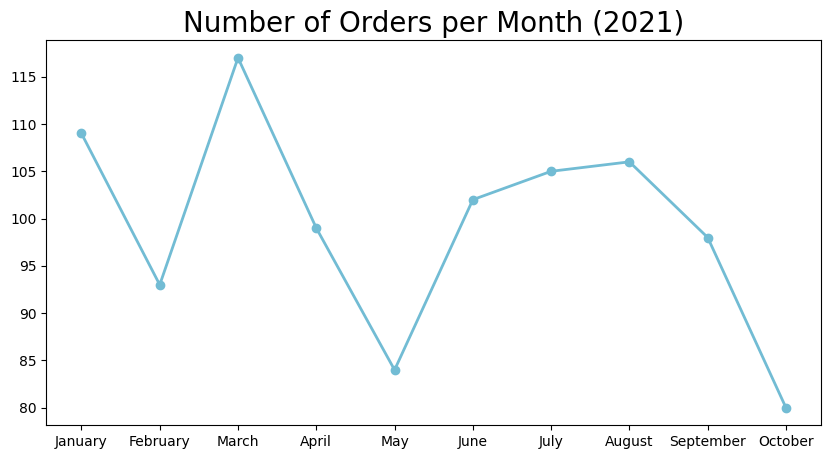

In [51]:
# buat line chart terkait jumlah order per bulan

monthly_orders_df = all_df.resample(rule='M', on='order_date').agg({
    "order_id": "nunique",
    "total_price": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%B') #mengubah format order date menjadi nama bulan

monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "total_price": "revenue"
}, inplace=True)

plt.figure(figsize=(10, 5))
plt.plot(monthly_orders_df["order_date"], monthly_orders_df["order_count"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Number of Orders per Month (2021)", loc="center", fontsize=20)
plt.xticks(fontsize=10)

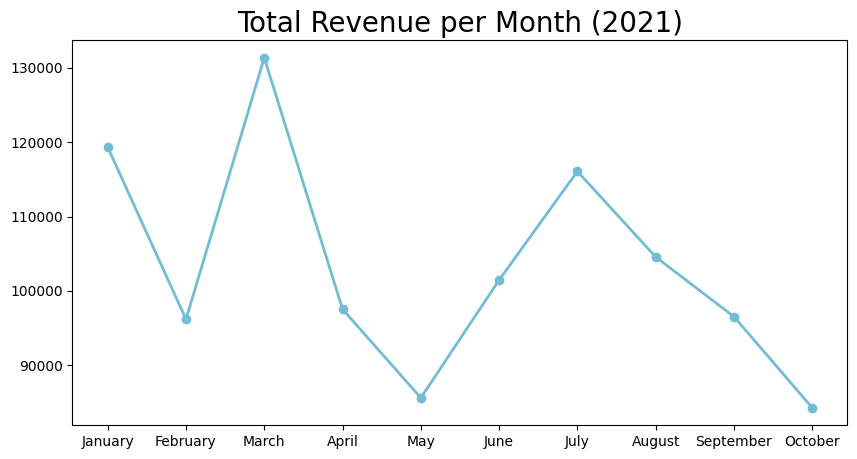

In [52]:
# validasi line chart di atas dengan menjumlahkan pendapatan per bulan

plt.figure(figsize=(10, 5))
plt.plot(
    monthly_orders_df["order_date"],
    monthly_orders_df["revenue"],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)
plt.title("Total Revenue per Month (2021)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### Produk Apa yang Paling Banyak dan Paling Sedikit Terjual?

In [53]:
# produk dengan penjualan terbanyak dan paling sedikit

sum_order_items_df = all_df.groupby("product_name").quantity_x.sum().sort_values(ascending=False).reset_index()
sum_order_items_df.head(15)

,product_name,quantity_x
0,Denim,527
1,Joggers,334
2,Pleated,308
3,Casual Slim Fit,306
4,Trench Coat,305
5,Shearling,302
6,Relaxed Leg,301
7,Puffer,298
8,Bomber,297
9,Chambray,290


/tmp/ipython-input-3711654597.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="quantity_x", y="product_name", data=sum_order_items_df.head(5), palette=colors, ax=ax[0])
/tmp/ipython-input-3711654597.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="quantity_x", y="product_name", data=sum_order_items_df.sort_values(by="quantity_x", ascending=True).head(5), palette=colors, ax=ax[1])


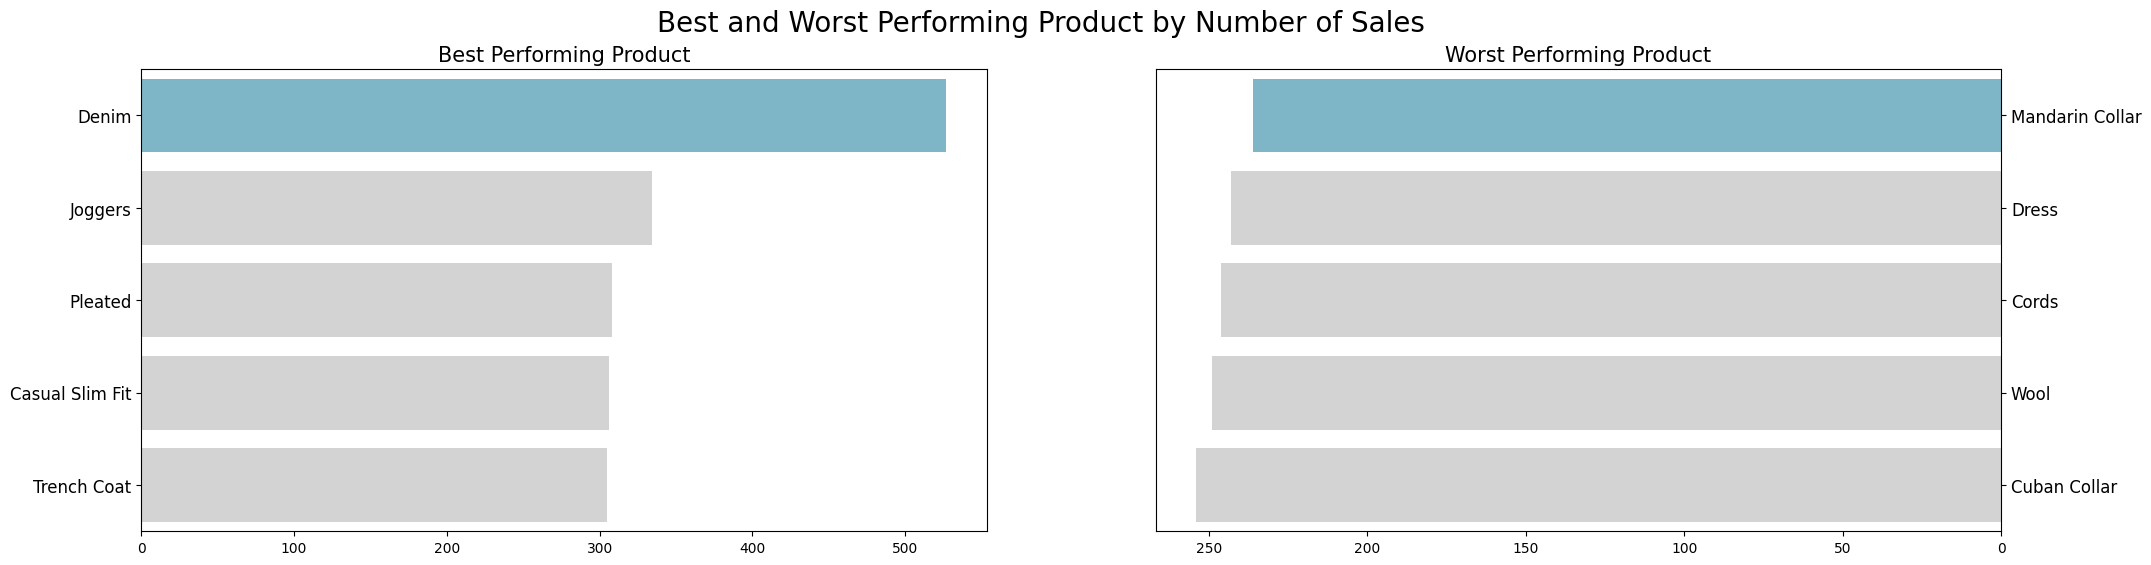

In [56]:
# buat barchart untuk tabel diatas

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))


colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="quantity_x", y="product_name", data=sum_order_items_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="quantity_x", y="product_name", data=sum_order_items_df.sort_values(by="quantity_x", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Best and Worst Performing Product by Number of Sales", fontsize=20)
plt.show()

### Bagaimana Demografi Pelanggan yang Kita Miliki?

/tmp/ipython-input-822398413.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-822398413.py:10: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.barplot(


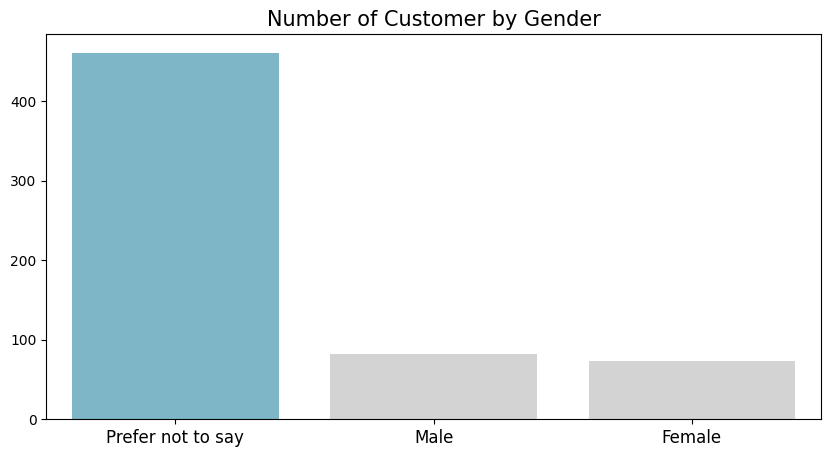

In [57]:
# Berdasarkan gender

bygender_df = all_df.groupby(by="gender").customer_id.nunique().reset_index()
bygender_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)

plt.figure(figsize=(10, 5))

sns.barplot(
    y="customer_count",
    x="gender",
    data=bygender_df.sort_values(by="customer_count", ascending=False),
    palette=colors
)
plt.title("Number of Customer by Gender", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

/tmp/ipython-input-176418848.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-176418848.py:12: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.barplot(


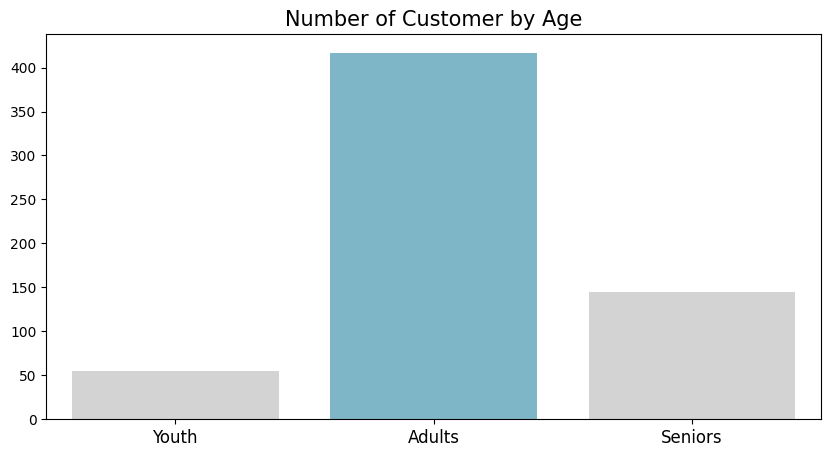

In [58]:
# Berdasarkan age

byage_df = all_df.groupby(by="age_group").customer_id.nunique().reset_index()
byage_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
byage_df
byage_df['age_group'] = pd.Categorical(byage_df['age_group'], ["Youth", "Adults", "Seniors"])
plt.figure(figsize=(10, 5))
colors_ = ["#D3D3D3", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    y="customer_count",
    x="age_group",
    data=byage_df.sort_values(by="age_group", ascending=False),
    palette=colors_
)
plt.title("Number of Customer by Age", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

/tmp/ipython-input-1159643899.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


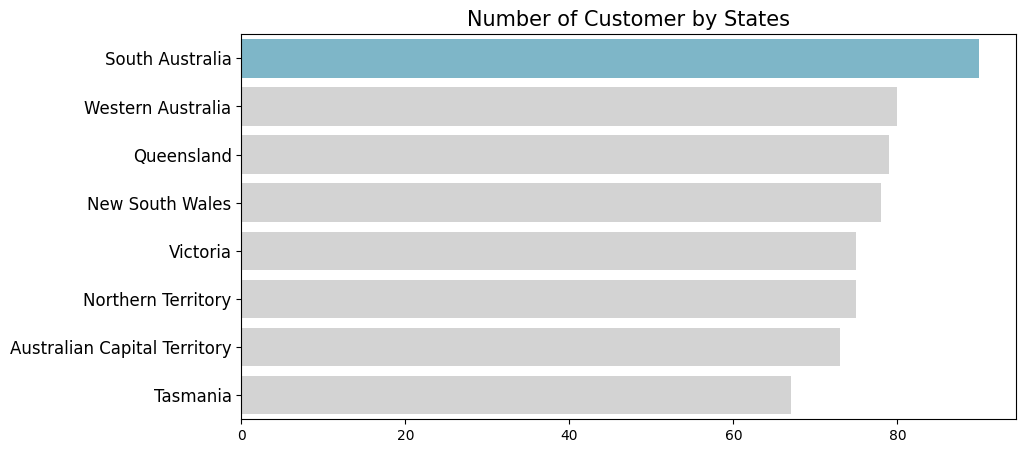

In [59]:
# Berdasarkan states

bystate_df = all_df.groupby(by="state").customer_id.nunique().reset_index()
bystate_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
bystate_df
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="customer_count",
    y="state",
    data=bystate_df.sort_values(by="customer_count", ascending=False),
    palette=colors_
)
plt.title("Number of Customer by States", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

## RFM Analysis

Teknik analisis lanjutkan bernama RFM Analysis dapat membantu dalam menganalisis segmentasi pelanggan (mengelompokkan pelanggan ke dalam beberapa kategori) berdasarkan tiga parameter, yaitu **recency**, **frequency**, dan **monetary**.

- Recency: parameter yang digunakan untuk melihat kapan terakhir seorang pelanggan melakukan transaksi.
- Frequency: parameter ini digunakan untuk mengidentifikasi seberapa sering seorang pelanggan melakukan transaksi.
- Monetary: parameter terakhir ini digunakan untuk mengidentifikasi seberapa besar revenue yang berasal dari pelanggan tersebut.

In [60]:
# Kode untuk memperoleh informasi terkait recency, frequency, dan monetary

rfm_df = all_df.groupby(by="customer_id", as_index=False).agg({
    "order_date": "max", # mengambil tanggal order terakhir
    "order_id": "nunique", # menghitung jumlah order
    "total_price": "sum" # menghitung jumlah revenue yang dihasilkan
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]

# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = orders_df["order_date"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
0,1,3,1641,203
1,7,1,1017,156
2,10,1,270,229
3,11,1,382,149
4,12,1,1551,127


### Mengindentifikasi best customers berdasarkan parameter RFM

/tmp/ipython-input-1210342829.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
/tmp/ipython-input-1210342829.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
/tmp/ipython-input-1210342829.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(b

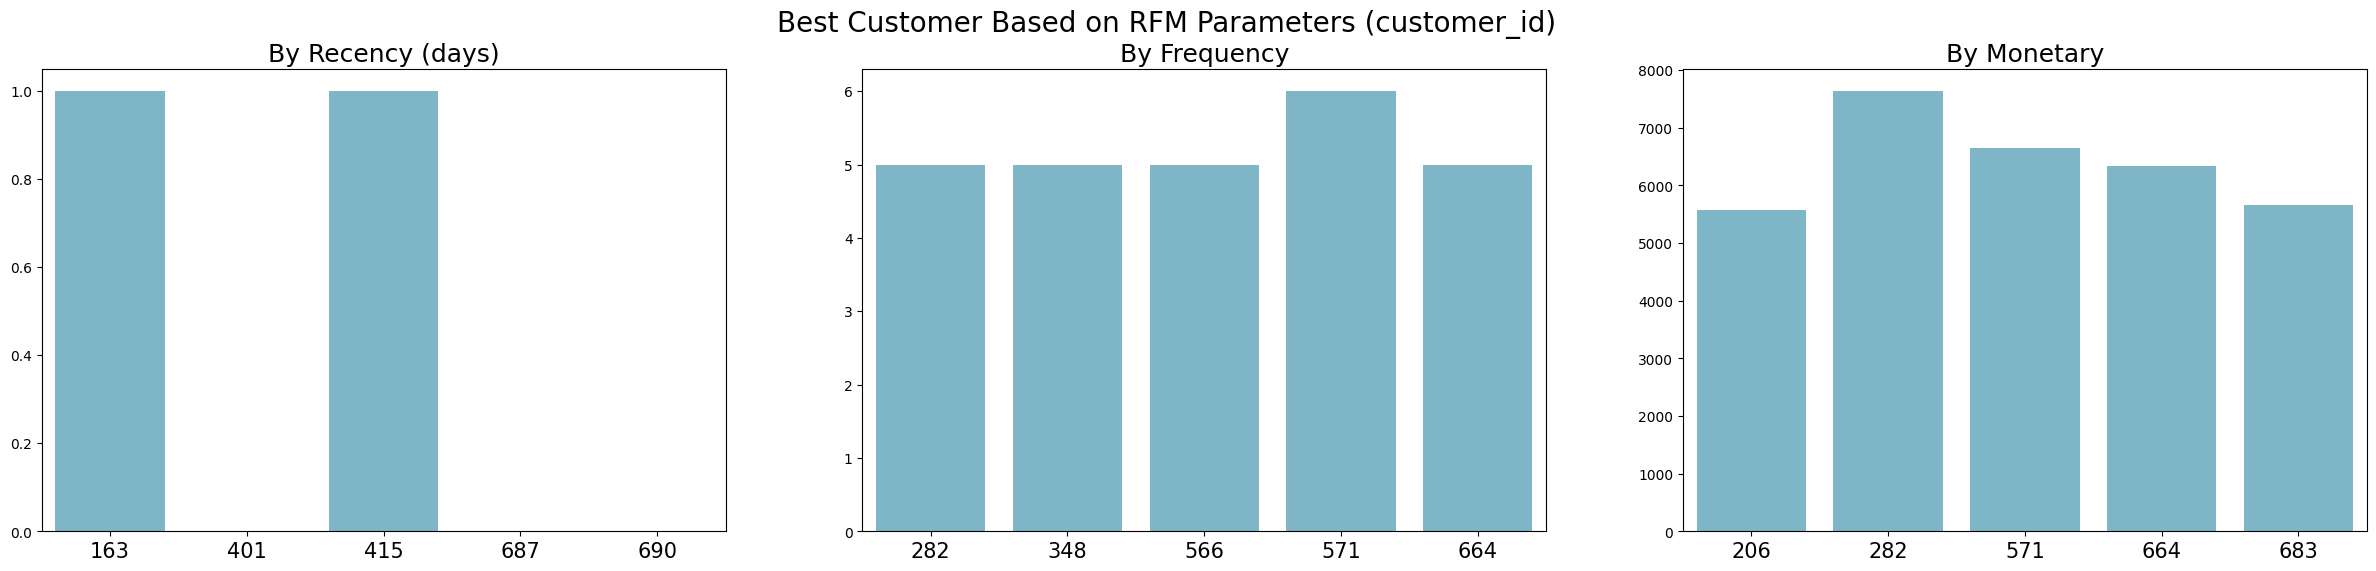

In [61]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()